<a href="https://colab.research.google.com/github/Ghanifhakbar/HAHA/blob/main/beneran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q catboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier,Pool
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Load data

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

train.head(20)

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,Spain,Male,38.0,2,62276.99,1,Yes,Yes,59280.79,No,4,DIAMOND,757,0
1,2,Chinweuba,529.0,France,Female,29.0,8,0.00,2,Yes,NaN,19842.11,No,3,SILVER,476,0
2,3,Clapp,589.0,France,Female,50.0,4,0.00,2,No,Yes,182076.97,No,4,PLATINUM,441,0
3,4,Boni,515.0,France,Male,40.0,0,109542.29,1,Yes,Yes,166370.81,No,5,GOLD,312,0
4,5,Jamieson,528.0,Spain,Male,43.0,7,97473.87,2,Yes,Yes,159823.16,No,3,PLATINUM,654,0
5,6,Niu,684.0,Spain,Female,38.0,3,134168.50,3,Yes,No,3966.50,Yes,5,DIAMOND,888,1
6,7,Foley,659.0,Spain,Male,NaN,3,107594.11,2,Yes,Yes,102416.84,No,3,DIAMOND,683,0
7,8,Khan,645.0,France,Male,39.0,8,0.00,2,No,No,96864.36,No,5,SILVER,287,0
8,9,Iweobiegbunam,610.0,Germany,Female,69.0,5,86038.21,3,No,No,192743.06,Yes,1,DIAMOND,613,1
9,10,Hsiung,488.0,Germany,Female,33.0,4,140002.35,1,Yes,No,123613.81,No,1,GOLD,935,0


In [ ]:
train['Complain'].value_counts(),

(Complain
 No     6422
 Yes    1608
 Name: count, dtype: int64,)

In [ ]:
test.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,2001,Ugonna,693,Germany,Male,44,5,124601.58,2,Yes,Yes,46998.13,Yes,2,SILVER,408
1,2002,Nebeolisa,607,Germany,Male,29,7,102609.00,1,Yes,No,163257.44,No,5,DIAMOND,800
2,2003,Tsai,689,Spain,Male,73,1,108555.07,1,No,Yes,167969.15,No,1,PLATINUM,623
3,2004,Downie,660,France,Female,38,5,110570.78,2,Yes,No,195906.59,No,1,SILVER,472
4,2005,Morehead,503,France,Male,38,1,0.00,2,Yes,Yes,95153.24,No,2,DIAMOND,433


In [ ]:
print(f'Train columns: {train.columns}')
print(f'Test columns: {test.columns}')

Train columns: Index(['ID', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned', 'Exited'],
      dtype='object')
Test columns: Index(['ID', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


# Exploratory Data Analysis (EDA)

---



In [ ]:
numerical_cols = [var for var in train.columns if train[var].dtype != 'object'] # get the numerical columns
categorical_cols = [var for var in train.columns if train[var].dtype == 'object'] # get the categorical columns


print('Numerical columns:')
print(numerical_cols)

Numerical columns:
['ID', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned', 'Exited']


In [ ]:
print('Categorical columns:')
print(categorical_cols)


Categorical columns:
['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']


put into correct format

In [ ]:
# prompt: ubah format geography dan gender ke object

# Convert 'Geography' and 'Gender' to object type
train['Geography'] = train['Geography'].astype('object')
train['Gender'] = train['Gender'].astype('object')

test['Geography'] = test['Geography'].astype('object')
test['Gender'] = test['Gender'].astype('object')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8030 non-null   int64  
 1   Surname             8030 non-null   object 
 2   CreditScore         7603 non-null   float64
 3   Geography           8030 non-null   object 
 4   Gender              7607 non-null   object 
 5   Age                 7588 non-null   float64
 6   Tenure              8030 non-null   int64  
 7   Balance             8030 non-null   float64
 8   NumOfProducts       8030 non-null   int64  
 9   HasCrCard           8030 non-null   object 
 10  IsActiveMember      7628 non-null   object 
 11  EstimatedSalary     7664 non-null   float64
 12  Complain            8030 non-null   object 
 13  Satisfaction Score  8030 non-null   int64  
 14  Card Type           8030 non-null   object 
 15  Point Earned        8030 non-null   int64  
 16  Exited

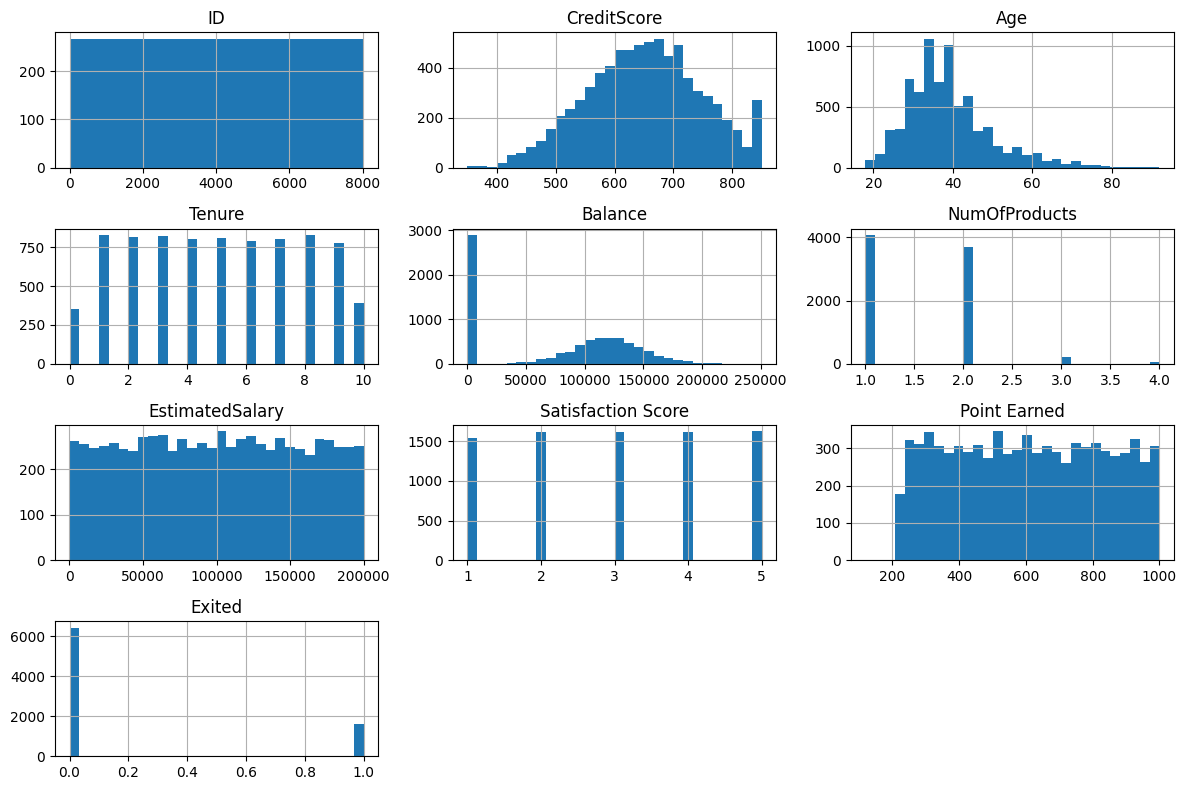

In [ ]:
train[numerical_cols].hist(bins=30, figsize=(12,8));
plt.tight_layout()
plt.show()

In [ ]:
# Removing 'Surname' from categorical_cols
k = 'Surname'

while(k in categorical_cols):
    categorical_cols.remove(k)

categorical_cols


['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']

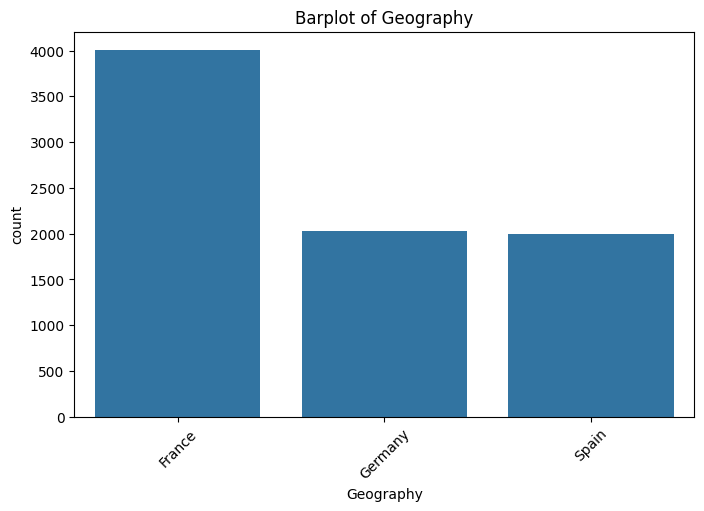

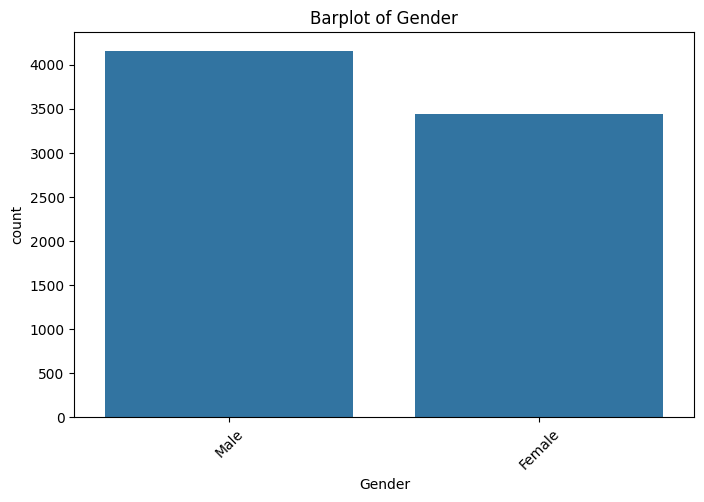

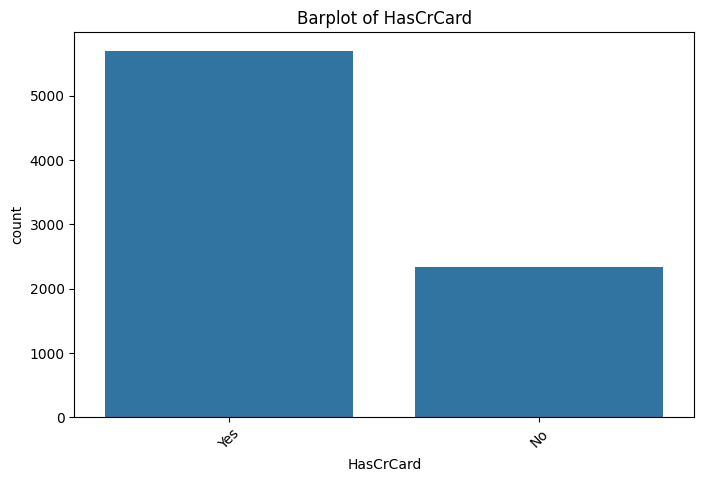

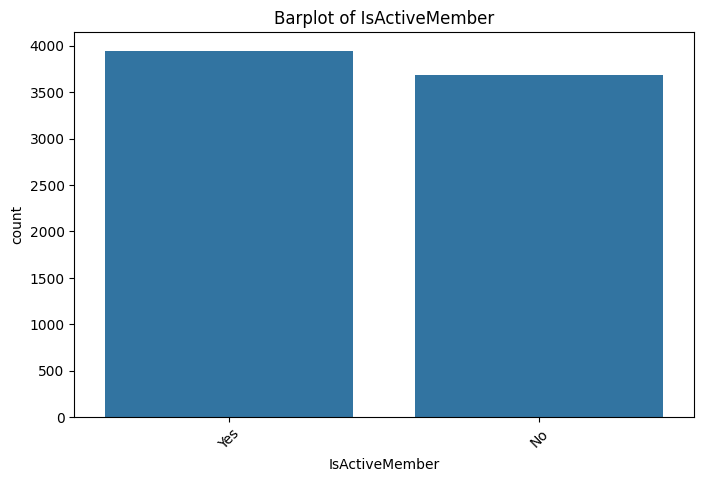

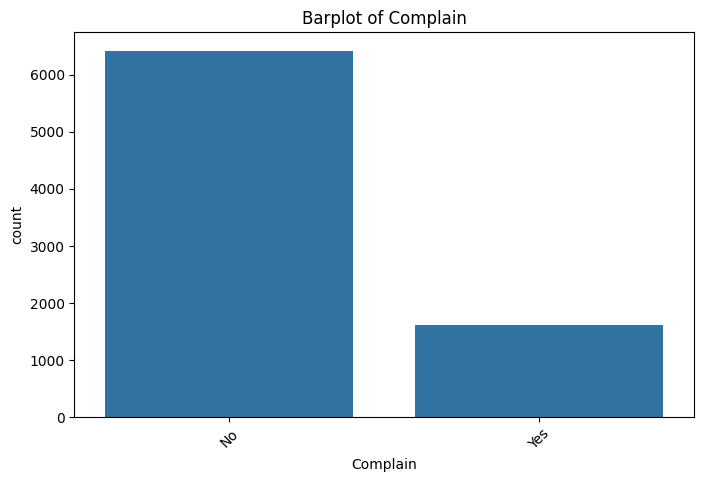

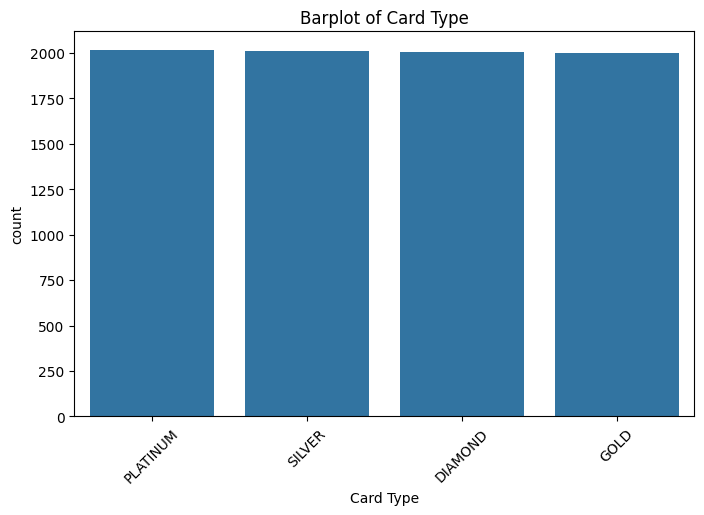

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.title(f'Barplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

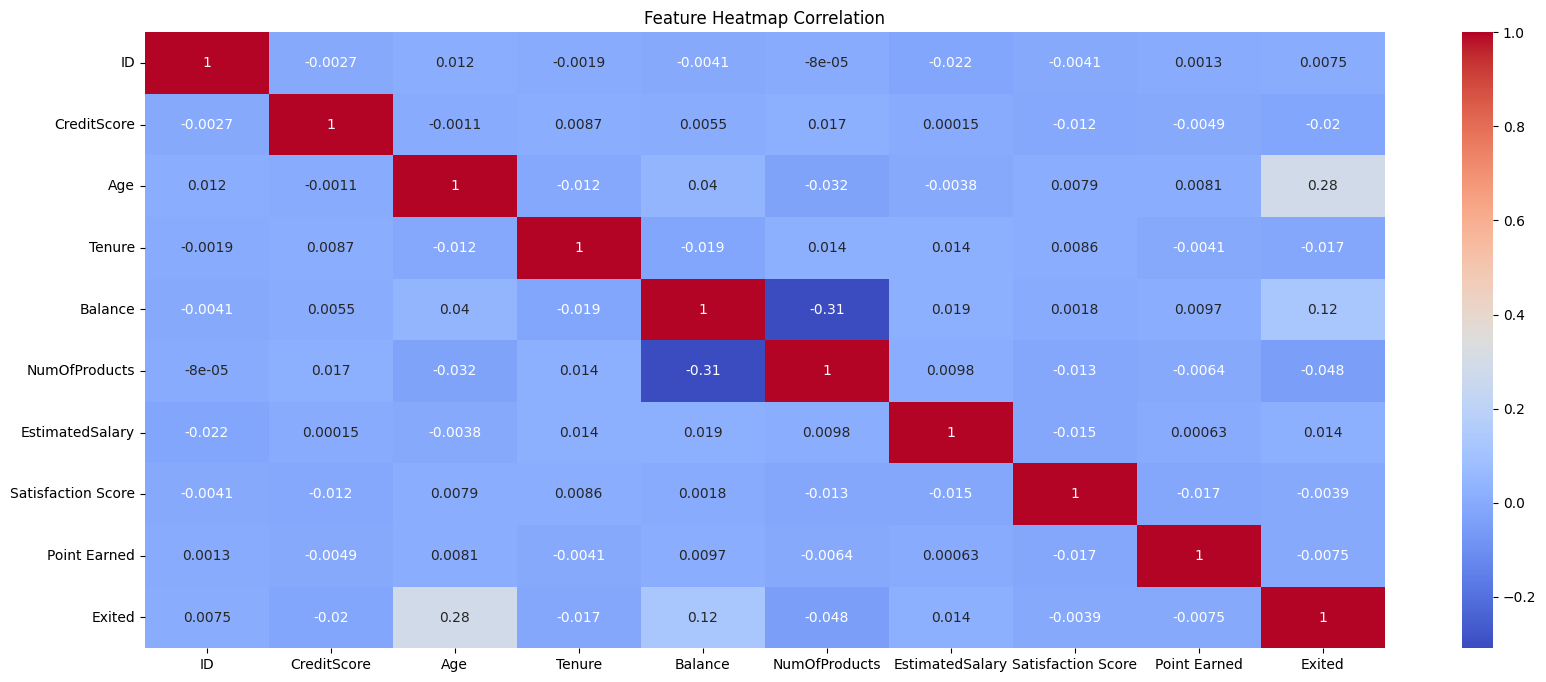

In [ ]:
train2 = train.copy()
num_corr = train2.drop('Surname', axis=1).select_dtypes(include=np.number).corr()
# The line above is changed to select only numerical columns before calculating correlation.

plt.figure(figsize=(20,8))
sns.heatmap(num_corr, annot=True, cmap='coolwarm')
plt.title('Feature Heatmap Correlation')
plt.show()

In [ ]:
# Frekuensi fitur kategorikal
for col in ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']:
    print(train[col].value_counts())

Geography
France     4006
Germany    2027
Spain      1997
Name: count, dtype: int64
Gender
Male      4162
Female    3445
Name: count, dtype: int64
HasCrCard
Yes    5700
No     2330
Name: count, dtype: int64
IsActiveMember
Yes    3948
No     3680
Name: count, dtype: int64
Complain
No     6422
Yes    1608
Name: count, dtype: int64
Card Type
PLATINUM    2017
SILVER      2010
DIAMOND     2003
GOLD        2000
Name: count, dtype: int64


# Feature Engineering & Data Preprocessing

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8030 non-null   int64  
 1   Surname             8030 non-null   object 
 2   CreditScore         7603 non-null   float64
 3   Geography           8030 non-null   object 
 4   Gender              7607 non-null   object 
 5   Age                 7588 non-null   float64
 6   Tenure              8030 non-null   int64  
 7   Balance             8030 non-null   float64
 8   NumOfProducts       8030 non-null   int64  
 9   HasCrCard           8030 non-null   object 
 10  IsActiveMember      7628 non-null   object 
 11  EstimatedSalary     7664 non-null   float64
 12  Complain            8030 non-null   object 
 13  Satisfaction Score  8030 non-null   int64  
 14  Card Type           8030 non-null   object 
 15  Point Earned        8030 non-null   int64  
 16  Exited

In [ ]:
train.isna().sum().sort_values(ascending=False)

,0
Age,442
CreditScore,427
Gender,423
IsActiveMember,402
EstimatedSalary,366
ID,0
Point Earned,0
Card Type,0
Satisfaction Score,0
Complain,0


In [ ]:
test.isna().sum().sort_values(ascending=False)

,0
ID,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


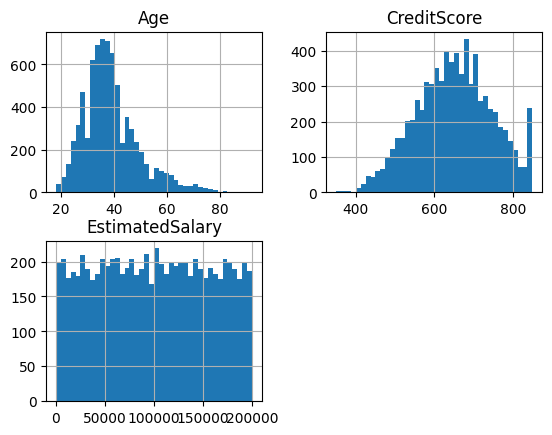

In [ ]:
train[['Age', 'CreditScore', 'EstimatedSalary']].hist(bins=40);

In [ ]:
train[['Age', 'CreditScore', 'EstimatedSalary']].skew()

,0
Age,1.047173
CreditScore,-0.058126
EstimatedSalary,0.005958


In [ ]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['CreditScore'] = train['CreditScore'].fillna(train['CreditScore'].mean())
train['EstimatedSalary'] = train['EstimatedSalary'].fillna(train['EstimatedSalary'].mean())
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['IsActiveMember'] = train['IsActiveMember'].fillna(train['IsActiveMember'].mode()[0])


In [ ]:
train['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,4074
2,3703
3,203
4,50


In [ ]:
train.isna().sum().sort_values(ascending=False)

,0
ID,0
HasCrCard,0
Point Earned,0
Card Type,0
Satisfaction Score,0
Complain,0
EstimatedSalary,0
IsActiveMember,0
NumOfProducts,0
Surname,0


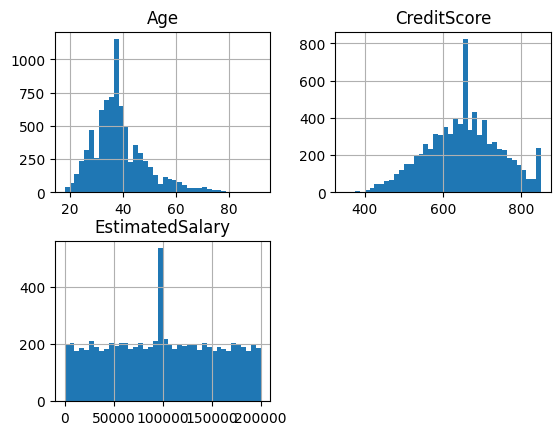

In [ ]:
train[['Age', 'CreditScore', 'EstimatedSalary']].hist(bins=40);

In [ ]:
train.duplicated().sum()

0

# Categorical Encoding

In [ ]:
for col in categorical_cols:
    print(train[col].value_counts())
    print('-'*50)

Geography
France     4006
Germany    2027
Spain      1997
Name: count, dtype: int64
--------------------------------------------------
Gender
Male      4585
Female    3445
Name: count, dtype: int64
--------------------------------------------------
HasCrCard
Yes    5700
No     2330
Name: count, dtype: int64
--------------------------------------------------
IsActiveMember
Yes    4350
No     3680
Name: count, dtype: int64
--------------------------------------------------
Complain
No     6422
Yes    1608
Name: count, dtype: int64
--------------------------------------------------
Card Type
PLATINUM    2017
SILVER      2010
DIAMOND     2003
GOLD        2000
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])


In [ ]:
categorical_cols

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8030 non-null   int64  
 1   Surname             8030 non-null   object 
 2   CreditScore         8030 non-null   float64
 3   Geography           8030 non-null   int64  
 4   Gender              8030 non-null   int64  
 5   Age                 8030 non-null   float64
 6   Tenure              8030 non-null   int64  
 7   Balance             8030 non-null   float64
 8   NumOfProducts       8030 non-null   int64  
 9   HasCrCard           8030 non-null   int64  
 10  IsActiveMember      8030 non-null   int64  
 11  EstimatedSalary     8030 non-null   float64
 12  Complain            8030 non-null   int64  
 13  Satisfaction Score  8030 non-null   int64  
 14  Card Type           8030 non-null   int64  
 15  Point Earned        8030 non-null   int64  
 16  Exited

In [ ]:
train['Geography'].value_counts()

,count
Geography,
0,4006
1,2027
2,1997


In [ ]:
train['Gender'].value_counts()

,count
Gender,
1,4585
0,3445


In [ ]:
train['Gender'].value_counts()

,count
Gender,
1,4585
0,3445


In [ ]:
train['Complain'].value_counts()

,count
Complain,
0,6422
1,1608


In [ ]:
train['Complain'].value_counts()

,count
Complain,
0,6422
1,1608


In [ ]:
train.drop(['ID', 'Surname'], axis=1, inplace=True)
train.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,727.0,2,1,38.0,2,62276.99,1,1,1,59280.79,0,4,0,757,0
1,529.0,0,0,29.0,8,0.00,2,1,1,19842.11,0,3,3,476,0
2,589.0,0,0,50.0,4,0.00,2,0,1,182076.97,0,4,2,441,0
3,515.0,0,1,40.0,0,109542.29,1,1,1,166370.81,0,5,1,312,0
4,528.0,2,1,43.0,7,97473.87,2,1,1,159823.16,0,3,2,654,0
5,684.0,2,0,38.0,3,134168.50,3,1,0,3966.50,1,5,0,888,1
6,659.0,2,1,37.0,3,107594.11,2,1,1,102416.84,0,3,0,683,0
7,645.0,0,1,39.0,8,0.00,2,0,0,96864.36,0,5,3,287,0
8,610.0,1,0,69.0,5,86038.21,3,0,0,192743.06,1,1,0,613,1
9,488.0,1,0,33.0,4,140002.35,1,1,0,123613.81,0,1,1,935,0


In [ ]:
numerical_cols

['ID',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Satisfaction Score',
 'Point Earned',
 'Exited']

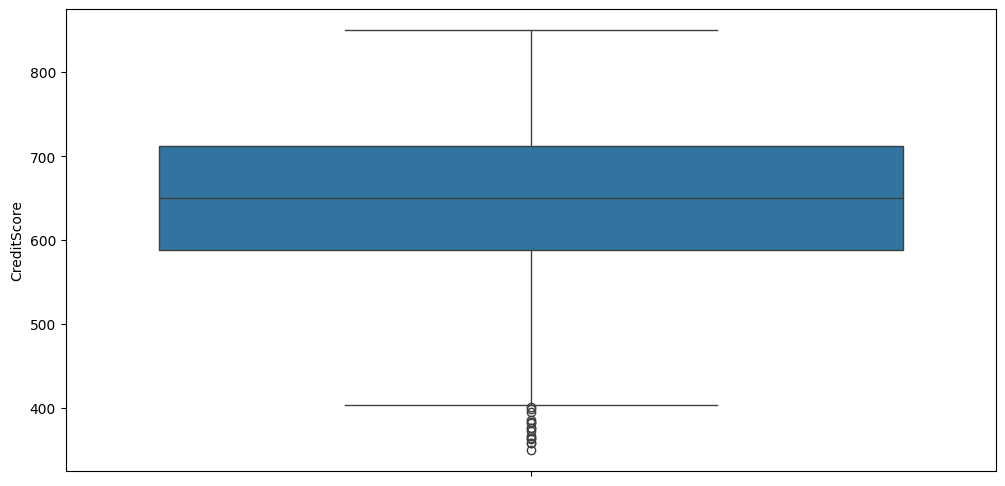

In [ ]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=train['CreditScore'])
plt.xticks(rotation=45)
plt.show()

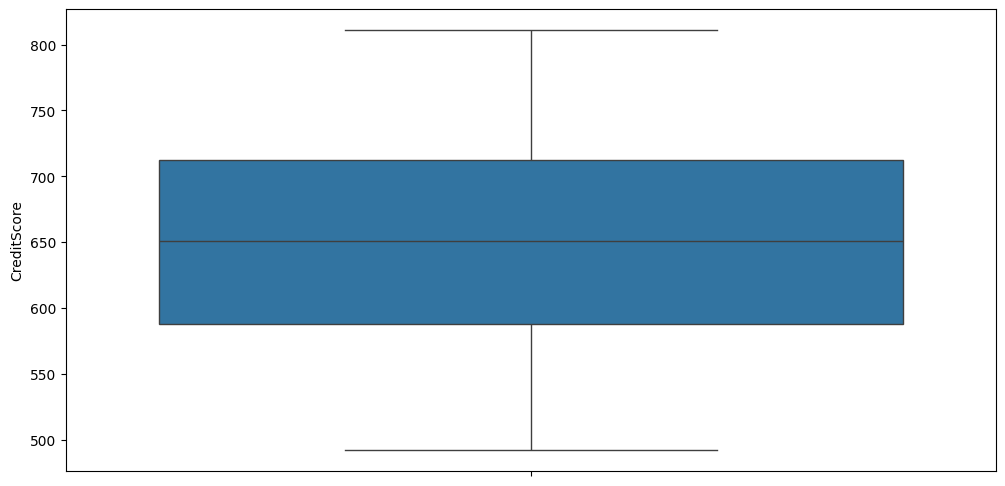

In [ ]:
def winsorize_outliers(df, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply winsorization to the 'CreditScore' column
train = winsorize_outliers(train, 'CreditScore')

# Create the boxplot after winsorization
plt.figure(figsize=(12, 6))
sns.boxplot(data=train['CreditScore'])
plt.xticks(rotation=45)
plt.show()

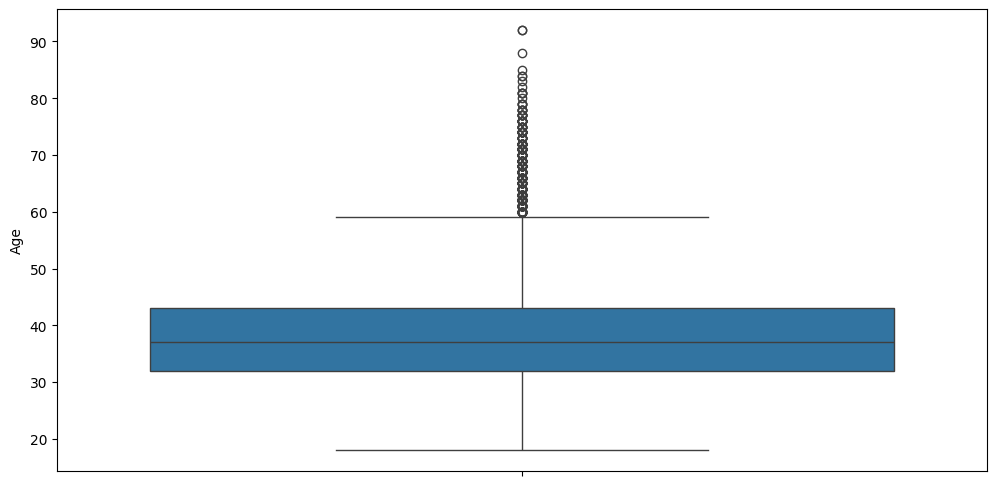

In [ ]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=train['Age'])
plt.xticks(rotation=45)
plt.show()

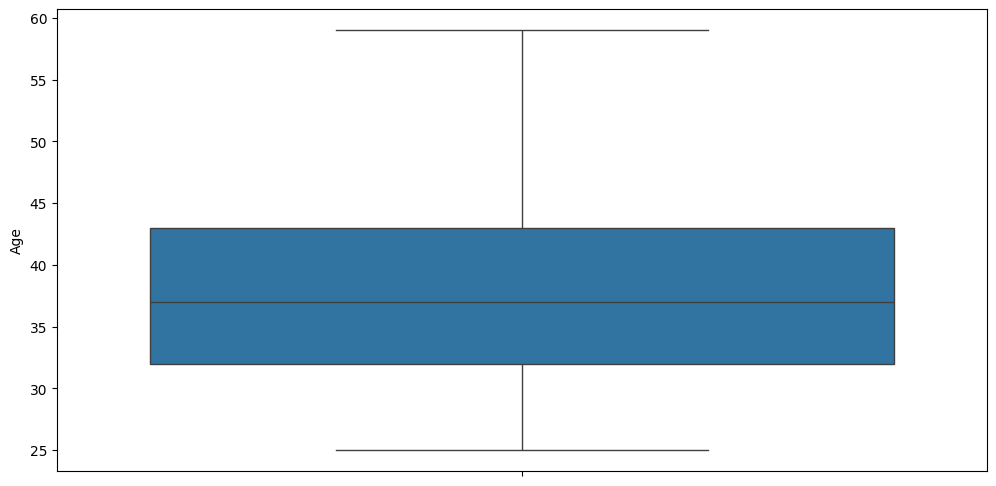

In [ ]:

def winsorize_outliers(df, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply winsorization to the 'Age' column
train = winsorize_outliers(train, 'Age')

# Create the boxplot after winsorization
plt.figure(figsize=(12, 6))
sns.boxplot(data=train['Age'])
plt.xticks(rotation=45)
plt.show()


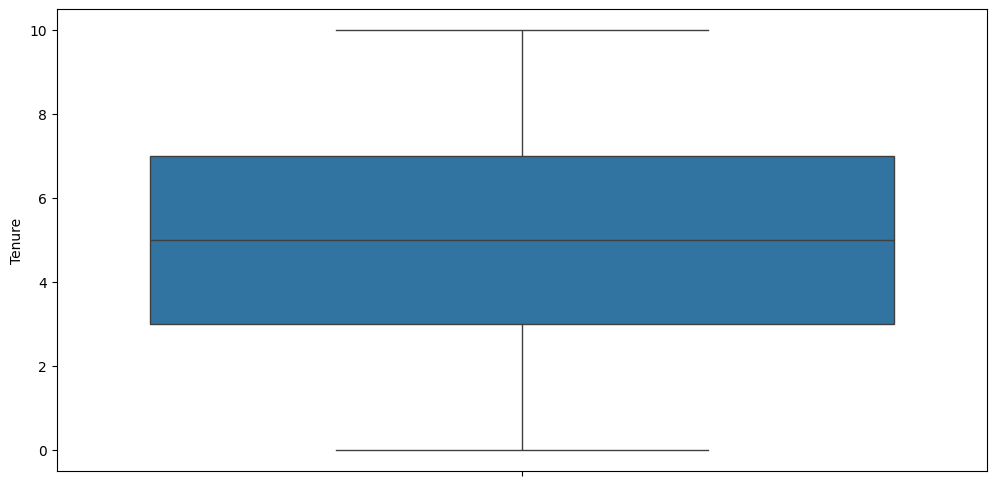

In [ ]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=train['Tenure'])
plt.xticks(rotation=45)
plt.show()

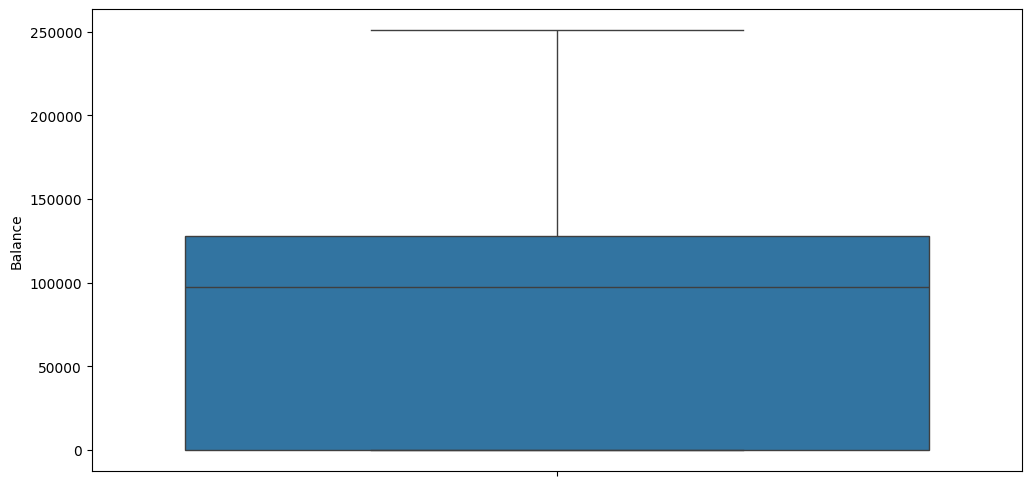

In [ ]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=train['Balance'])
plt.xticks(rotation=45)
plt.show()

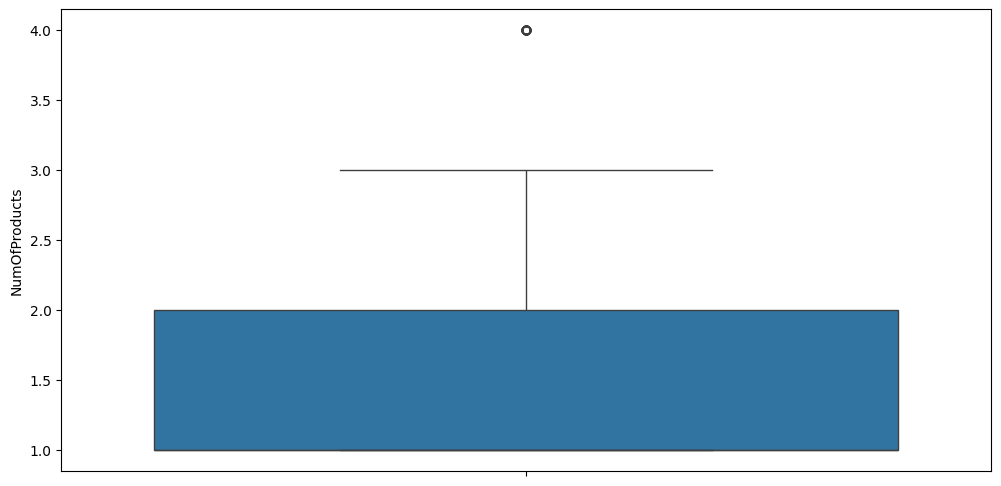

In [ ]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=train['NumOfProducts'])
plt.xticks(rotation=45)
plt.show()

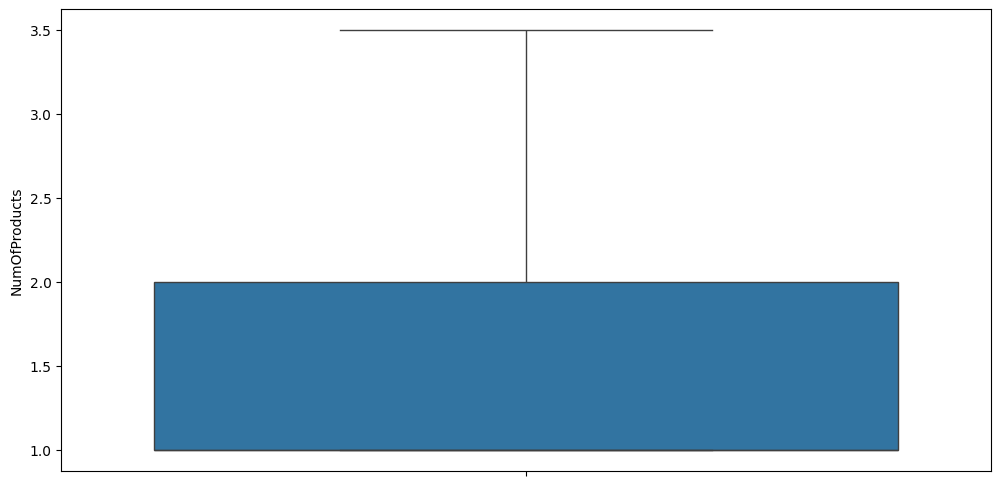

In [ ]:

Q1 = train['NumOfProducts'].quantile(0.25)
Q3 = train['NumOfProducts'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train['NumOfProducts'] = train['NumOfProducts'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

plt.figure(figsize=(12, 6))
sns.boxplot(data=train['NumOfProducts'])
plt.xticks(rotation=45)
plt.show()

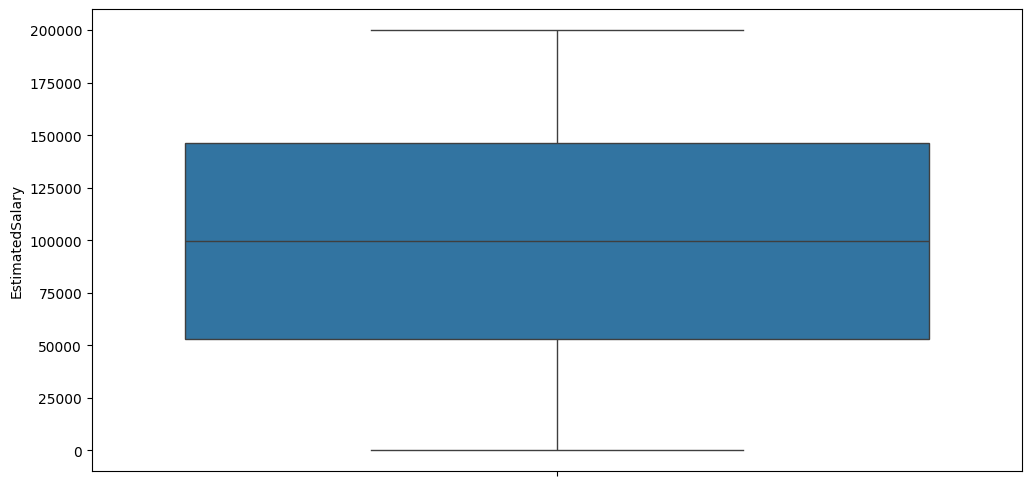

In [ ]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=train['EstimatedSalary'])
plt.xticks(rotation=45)
plt.show()

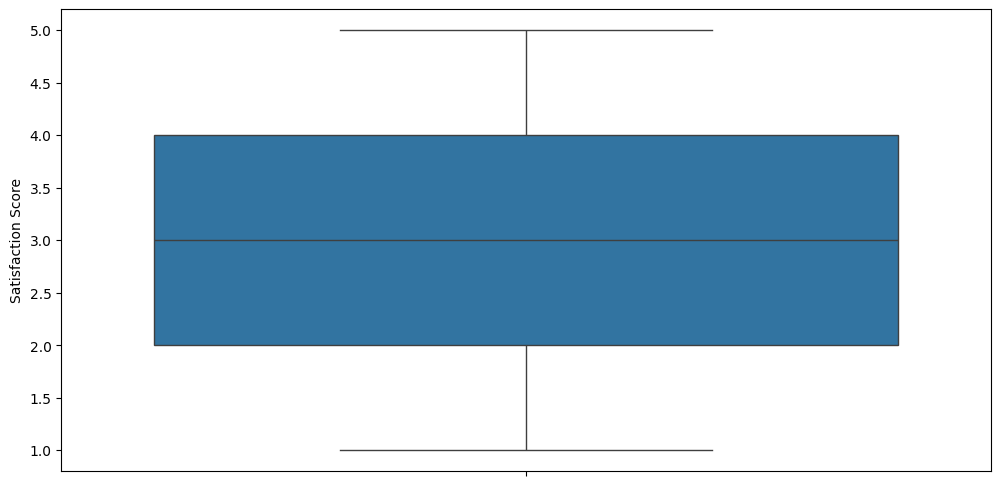

In [ ]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=train['Satisfaction Score'])
plt.xticks(rotation=45)
plt.show()

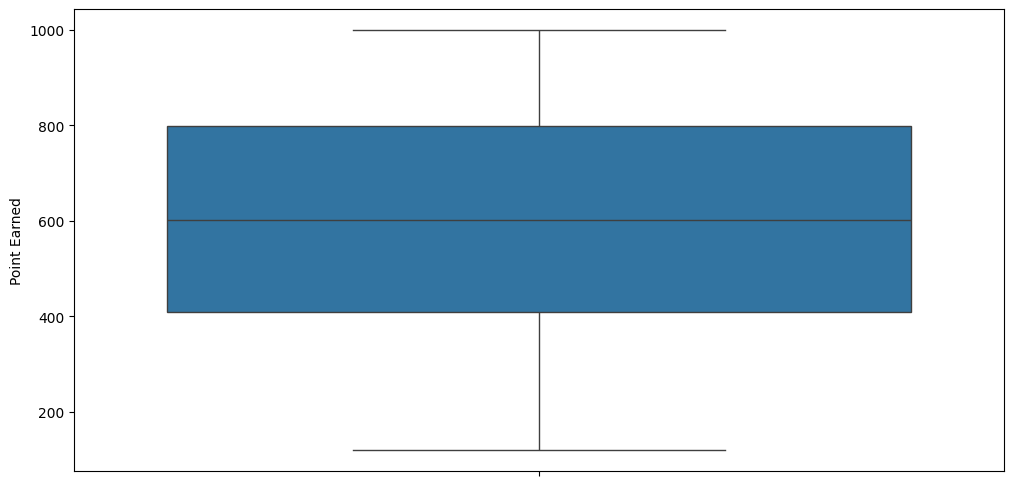

In [ ]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=train['Point Earned'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,727.0,2,1,38.0,2,62276.99,1.0,1,1,59280.79,0,4,0,757,0
1,529.0,0,0,29.0,8,0.00,2.0,1,1,19842.11,0,3,3,476,0
2,589.0,0,0,50.0,4,0.00,2.0,0,1,182076.97,0,4,2,441,0
3,515.0,0,1,40.0,0,109542.29,1.0,1,1,166370.81,0,5,1,312,0
4,528.0,2,1,43.0,7,97473.87,2.0,1,1,159823.16,0,3,2,654,0


In [ ]:
test.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,2001,Ugonna,693,1,1,44,5,124601.58,2,1,1,46998.13,1,2,3,408
1,2002,Nebeolisa,607,1,1,29,7,102609.00,1,1,0,163257.44,0,5,0,800
2,2003,Tsai,689,2,1,73,1,108555.07,1,0,1,167969.15,0,1,2,623
3,2004,Downie,660,0,0,38,5,110570.78,2,1,0,195906.59,0,1,3,472
4,2005,Morehead,503,0,1,38,1,0.00,2,1,1,95153.24,0,2,0,433


feurture scalling opsional bisa dihapus nnti

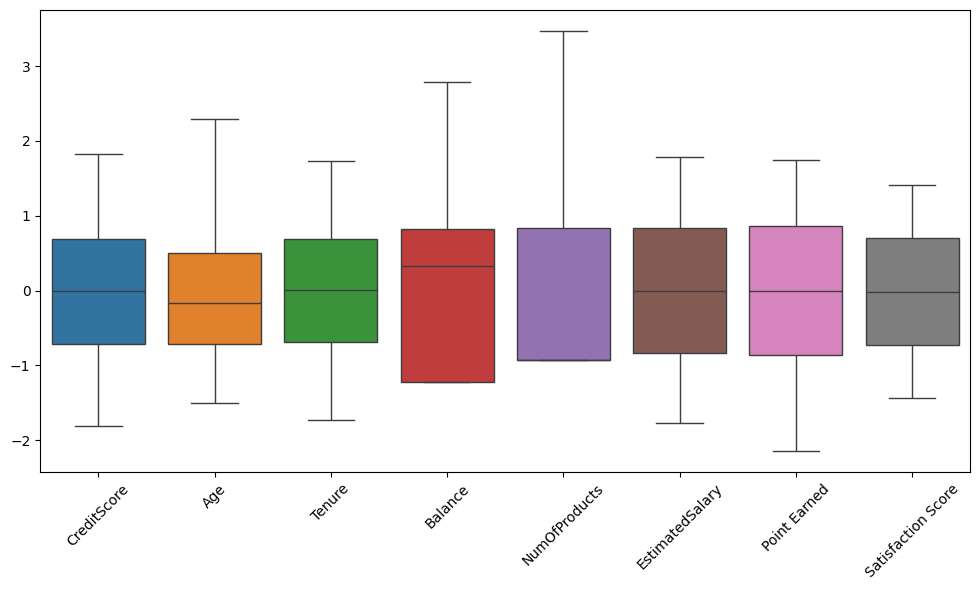

In [ ]:
# prompt: buatkan feuture scalling untuk numerik fitur

from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'Satisfaction Score']

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit and transform the numerical features in the training set
train[numerical_features] = scaler.fit_transform(train[numerical_features])

# Transform the numerical features in the test set using the same scaler
test[numerical_features] = scaler.transform(test[numerical_features])

# Display the scaled training data
train.head()
plt.figure(figsize=(12, 6))
sns.boxplot(data=train[numerical_features])
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Split numerical and categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# split data train

In [ ]:
# Split into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=111)

# Create CatBoost Pool for categorical features
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_val, y_val, cat_features=categorical_features)

# Machine Learning Modelling

In [ ]:
# Create and train CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    eval_metric='AUC',
    random_seed=111,
    verbose=100,
    early_stopping_rounds=32
)

model.fit(train_pool, eval_set=test_pool, verbose=True)

0:	test: 0.9993984	best: 0.9993984 (0)	total: 1.74ms	remaining: 173ms
1:	test: 0.9992058	best: 0.9993984 (0)	total: 3.13ms	remaining: 153ms
2:	test: 0.9993709	best: 0.9993984 (0)	total: 4.61ms	remaining: 149ms
3:	test: 0.9993284	best: 0.9993984 (0)	total: 6.43ms	remaining: 154ms
4:	test: 0.9992646	best: 0.9993984 (0)	total: 7.87ms	remaining: 150ms
5:	test: 0.9993659	best: 0.9993984 (0)	total: 9.65ms	remaining: 151ms
6:	test: 0.9993359	best: 0.9993984 (0)	total: 11.3ms	remaining: 150ms
7:	test: 0.9993271	best: 0.9993984 (0)	total: 22.9ms	remaining: 263ms
8:	test: 0.9992996	best: 0.9993984 (0)	total: 25.1ms	remaining: 254ms
9:	test: 0.9993321	best: 0.9993984 (0)	total: 28ms	remaining: 252ms
10:	test: 0.9992721	best: 0.9993984 (0)	total: 29.4ms	remaining: 238ms
11:	test: 0.9992321	best: 0.9993984 (0)	total: 30.8ms	remaining: 226ms
12:	test: 0.9992121	best: 0.9993984 (0)	total: 32.3ms	remaining: 216ms
13:	test: 0.9992121	best: 0.9993984 (0)	total: 33.6ms	remaining: 207ms
14:	test: 0.999247

In [ ]:
# Hitung korelasi Pearson antara fitur numerik dan target
correlation_matrix = train.corr()

# Ambil korelasi dengan target (Exited) dan urutkan dari yang tertinggi
target_correlation = correlation_matrix['Exited'].sort_values(ascending=False)

# Tampilkan fitur dengan korelasi tertinggi
print("Fitur dengan Korelasi Tertinggi terhadap Target (Exited):")
print(target_correlation)

Fitur dengan Korelasi Tertinggi terhadap Target (Exited):
Exited                1.000000
Complain              0.996109
Age                   0.317743
Balance               0.122083
Geography             0.046613
EstimatedSalary       0.013368
Satisfaction Score   -0.003875
Point Earned         -0.007469
HasCrCard            -0.014530
CreditScore          -0.015816
Tenure               -0.016579
Card Type            -0.023080
NumOfProducts        -0.060130
Gender               -0.094265
IsActiveMember       -0.153126
Name: Exited, dtype: float64
